In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

np.set_printoptions(legacy='1.13')

## Comparing Distributions

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


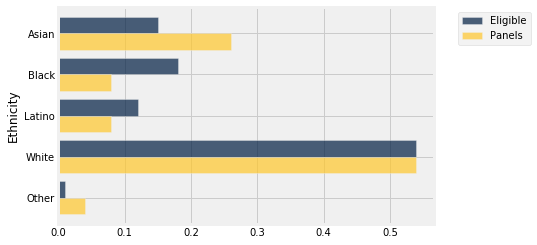

In [3]:
jury.barh('Ethnicity')

In [4]:
jury_with_diffs = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))

In [5]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [6]:
jury_with_diffs = jury_with_diffs.with_column('Absolute Difference', np.abs(jury_with_diffs.column('Difference')))

In [7]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [8]:
sum(jury_with_diffs.column('Absolute Difference'))

0.28000000000000003

In [9]:
sum(jury_with_diffs.column('Absolute Difference')) / 2

0.14000000000000001

In [10]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [11]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14000000000000001

In [12]:
eligible = jury.column('Eligible')

In [13]:
panels_and_sample = jury.with_column('Random Sample', sample_proportions(1453, eligible))

In [14]:
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.153476
Black,0.18,0.08,0.185822
Latino,0.12,0.08,0.109429
White,0.54,0.54,0.543703
Other,0.01,0.04,0.00757054


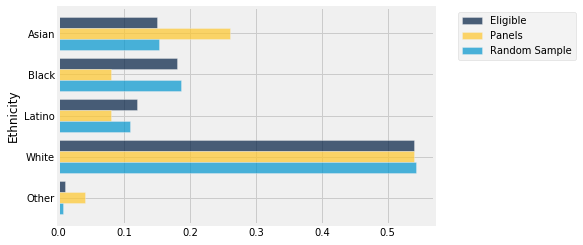

In [15]:
panels_and_sample.barh('Ethnicity')

In [16]:
total_variation_distance(panels_and_sample.column('Random Sample'), eligible)

0.013000688231245668

In [17]:
total_variation_distance(jury.column('Panels'), eligible)

0.14000000000000001

In [18]:
tvds = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)

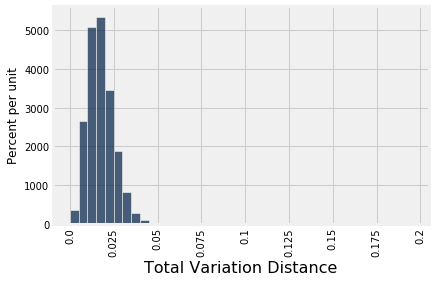

In [19]:
Table().with_column('Total Variation Distance', tvds).hist(bins = np.arange(0, 0.2, 0.005), ec='w')

In [20]:
total_variation_distance(jury.column('Panels'), eligible)

0.14000000000000001